1. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

2. ImageDataGenerator 설정

In [2]:
file_path = "C:/Users/windows/Desktop/Animals Image Classification/data/animals10/raw-img"
train_data_g = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_g = ImageDataGenerator(rescale=1./255, validation_split=0.2)

3. 데이터 로딩

In [3]:
train_data = train_data_g.flow_from_directory(file_path,
                                               target_size = (224,224), 
                                               batch_size = 32,
                                               class_mode = 'categorical')
                                               
test_data = test_data_g.flow_from_directory(file_path,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 26179 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.


4. CNN 모델 정의

In [4]:
model = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(16, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation = "relu"),
    Dropout(0.2),
    Dense(512, activation = "relu"),
    Dropout(0.2),

    Dense(train_data.num_classes, activation = "softmax")
])

5. 모델 요약 출력

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,953,002 (18.89 MB)

 Trainable params: 4,953,002 (18.89 MB)

 Non-trainable params: 0 (0.00 B)

6. 모델 컴파일

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

7. 모델 학습

In [7]:
fit = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10


c:\Users\windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 325s 394ms/step - accuracy: 0.3081 - loss: 1.9383 - val_accuracy: 0.5644 - val_loss: 1.2920
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 362s 440ms/step - accuracy: 0.5509 - loss: 1.3025 - val_accuracy: 0.6634 - val_loss: 0.9818
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 348s 425ms/step - accuracy: 0.6583 - loss: 1.0137 - val_accuracy: 0.7421 - val_loss: 0.7763
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 346s 423ms/step - accuracy: 0.7374 - loss: 0.7745 - val_accuracy: 0.8436 - val_loss: 0.5074
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 353s 431ms/step - accuracy: 0.8063 - loss: 0.5742 - val_accuracy: 0.8941 - val_loss: 0.3335
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 425s 518ms/step - accuracy: 0.8599 - loss: 0.4189 - val_accuracy: 0.9285 - val_loss: 0.2367
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 391s 476ms/step - accuracy: 0.8988 - loss: 0.3151 - val_accuracy: 0.9617 - val_loss: 0.1378
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 418s 509ms/step - accuracy: 0.9150 - loss: 0.24

8. 시각화

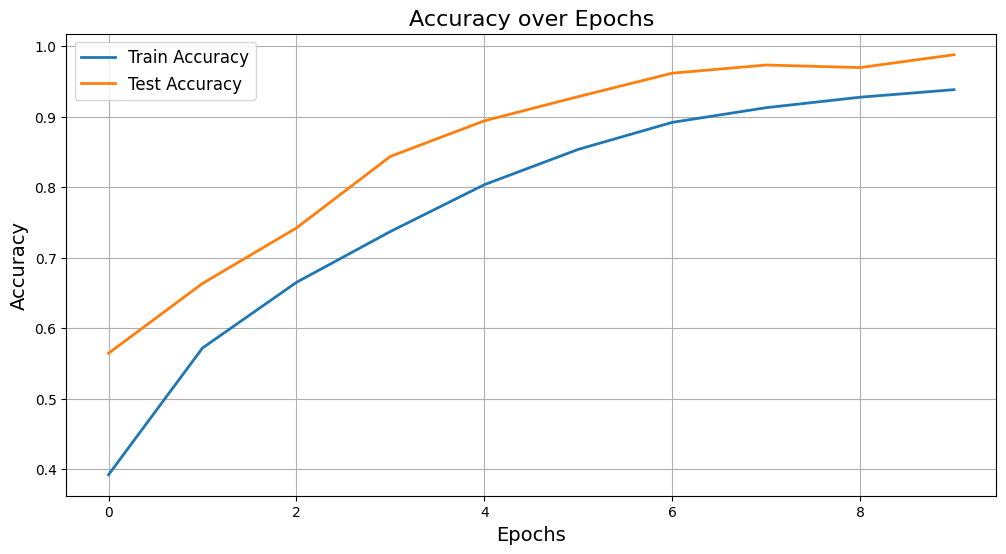

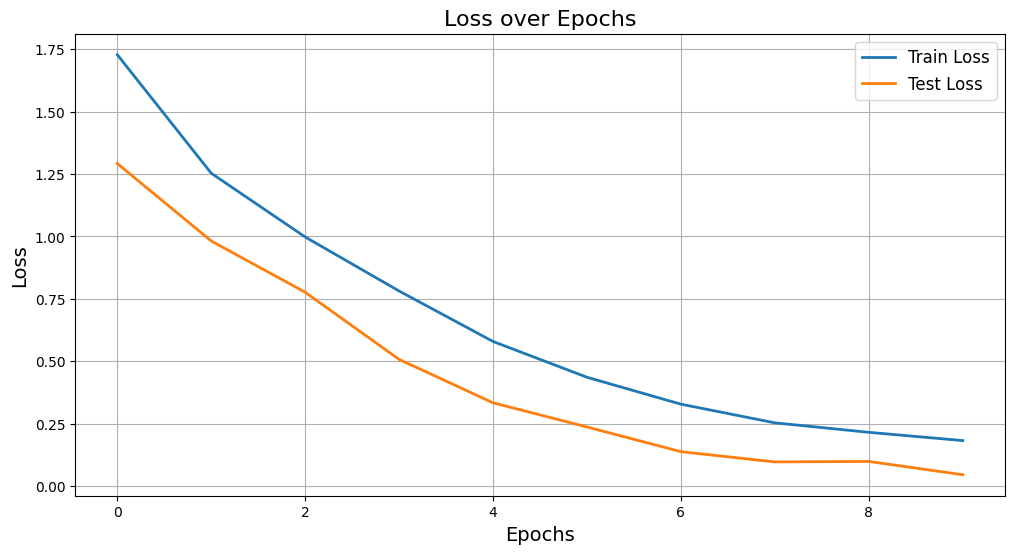

In [13]:
# Accuracy 그래프
plt.figure(figsize=(12, 6))
plt.plot(fit.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(fit.history['val_accuracy'], label='Test Accuracy', linewidth=2)
plt.title('Accuracy over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Loss 그래프
plt.figure(figsize=(12, 6))
plt.plot(fit.history['loss'], label='Train Loss', linewidth=2)
plt.plot(fit.history['val_loss'], label='Test Loss', linewidth=2)
plt.title('Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()